# **Scenario: Traffic Signal Management**

## **Problem Overview:**
The goal is to optimize the scheduling of traffic lights at intersections to minimize conflicts and maximize traffic flow. Each intersection is represented as a node in a graph, and the edges between nodes indicate that the two intersections are adjacent and should not have the same signal color (representing different signal timings).

## **Explanation:**
Nodes represent intersections.
Edges represent a direct path between intersections where traffic light timings should be synchronized (e.g., two intersections along the same road should not turn green at the same time).
Colors represent different timing slots for traffic lights.

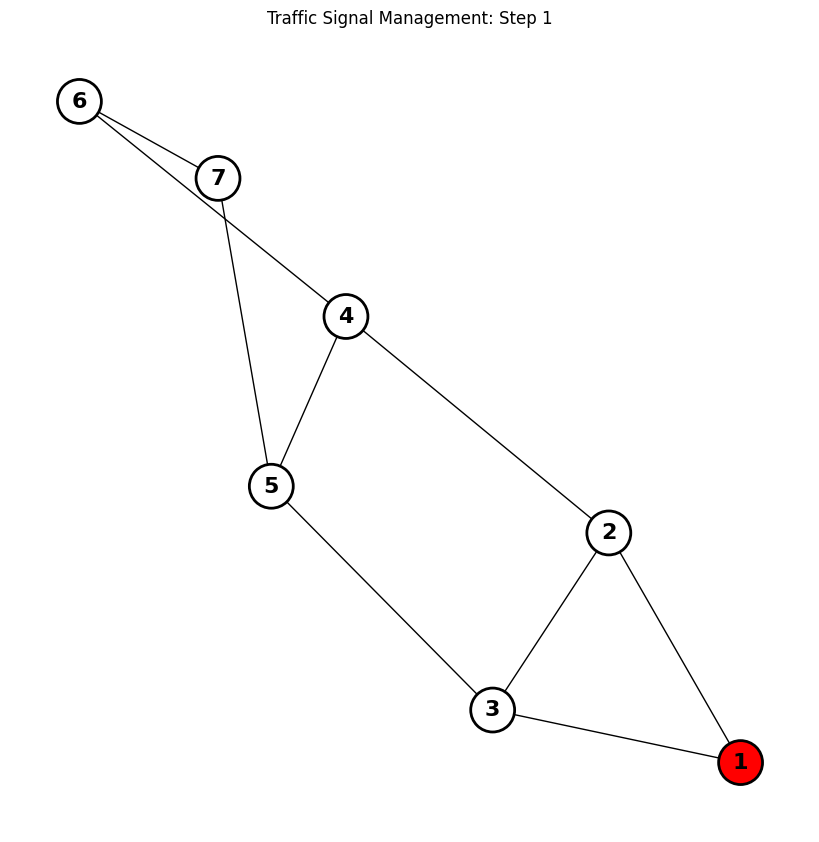

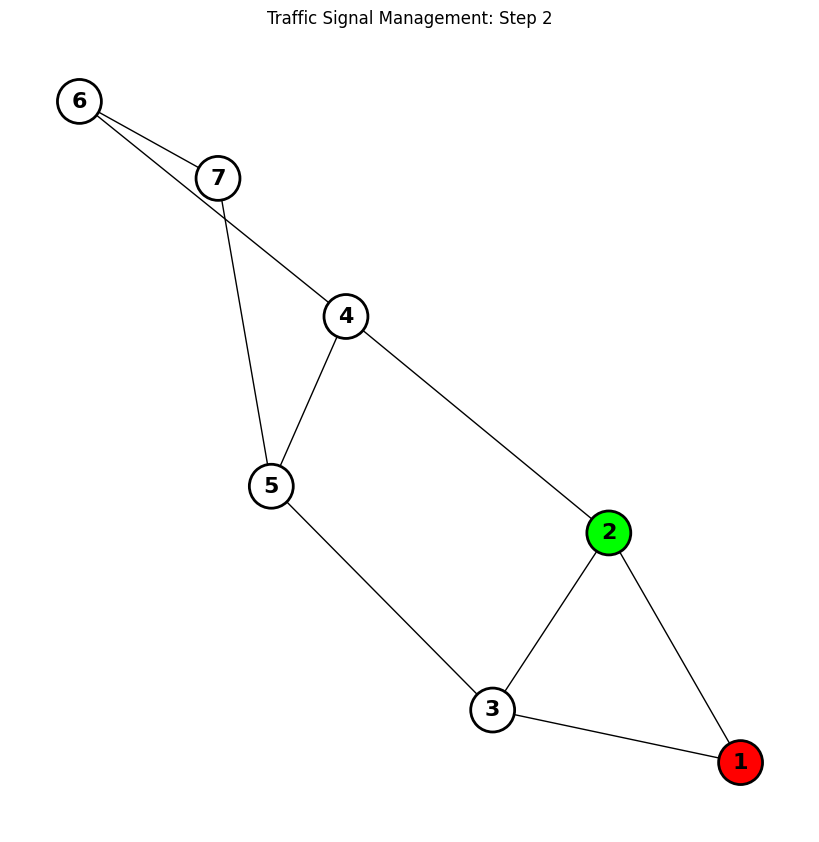

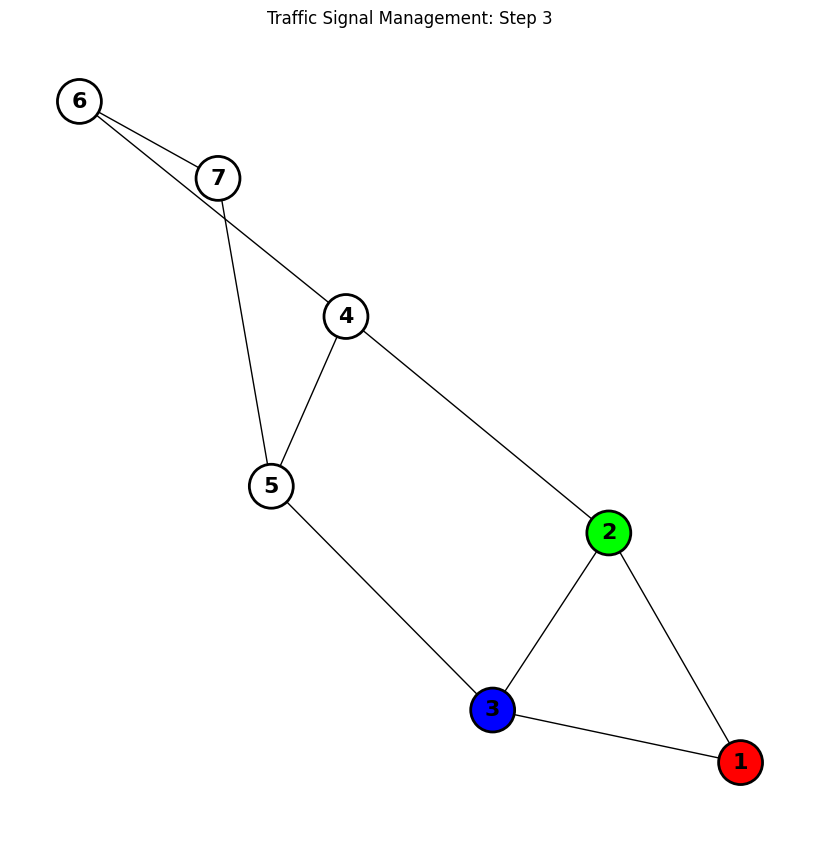

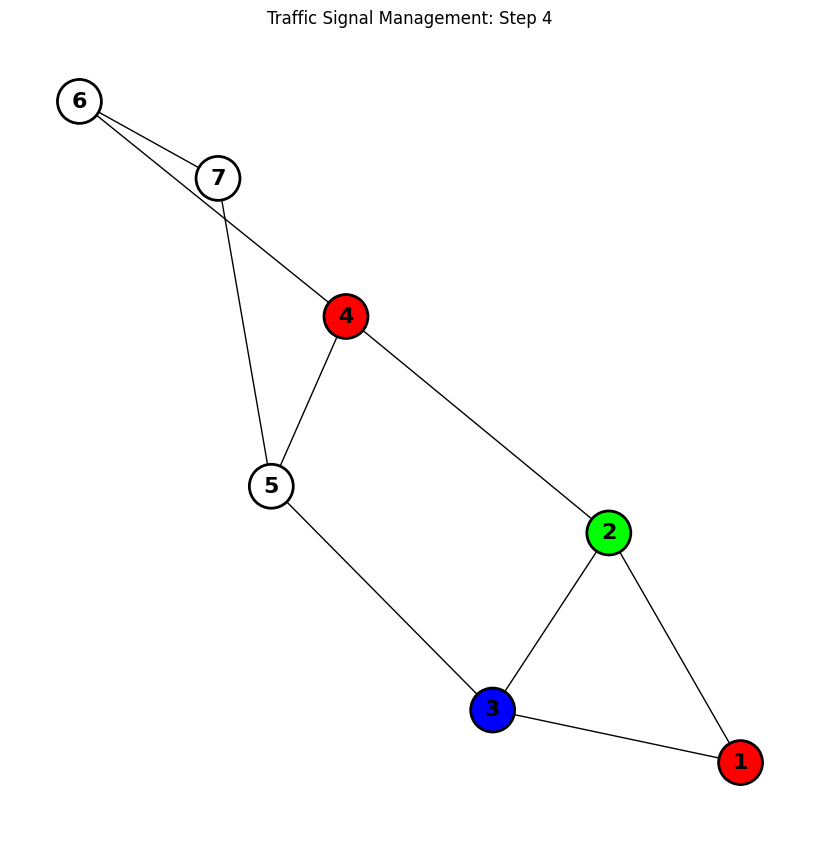

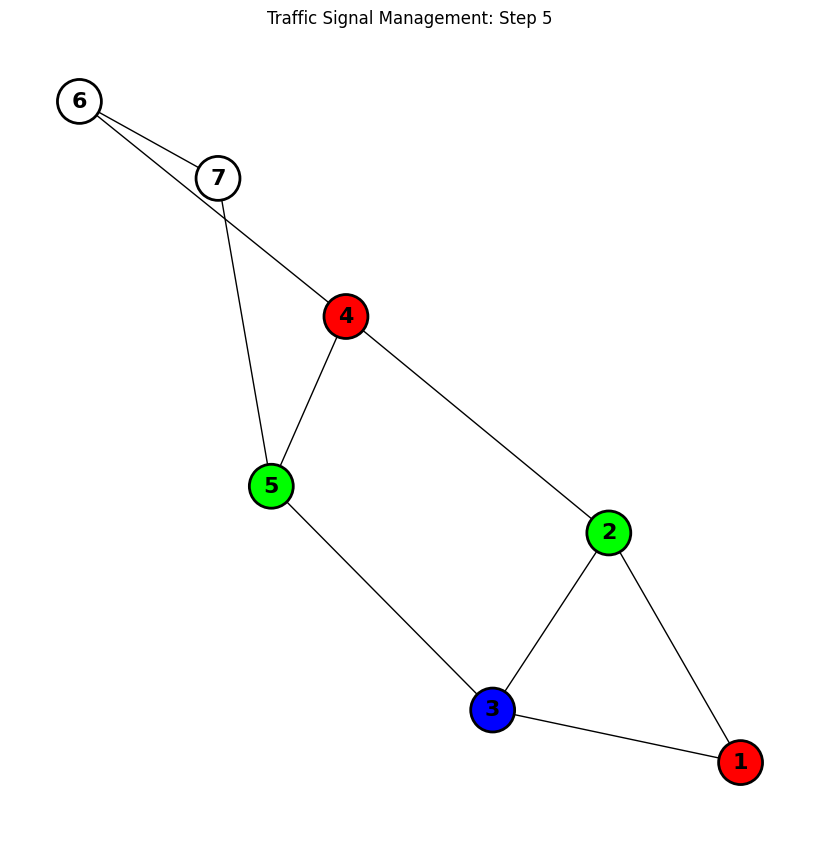

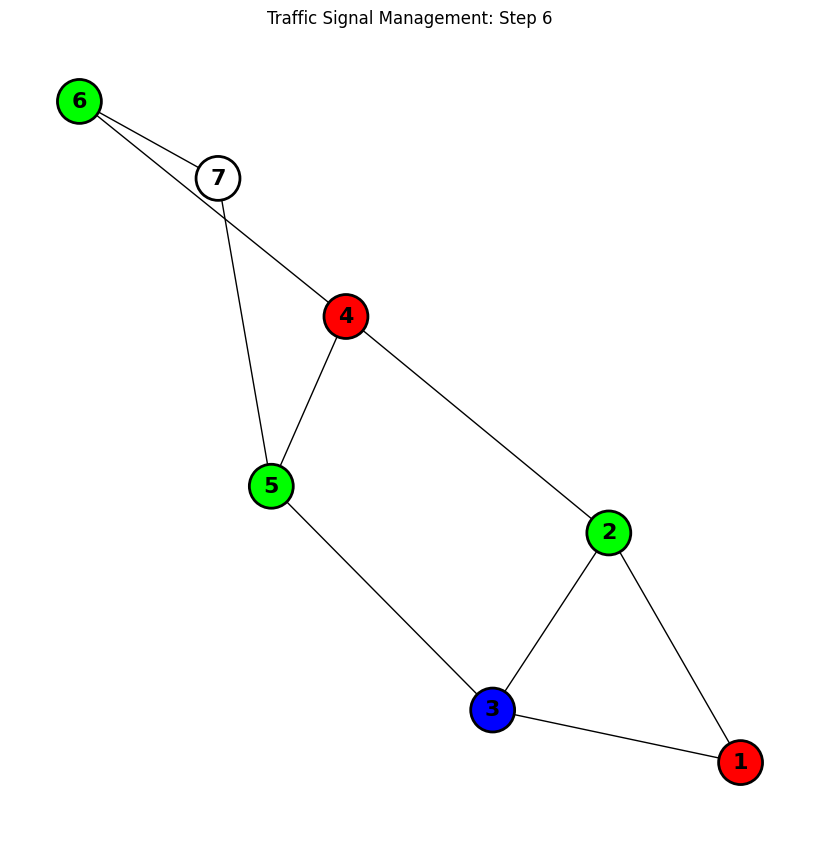

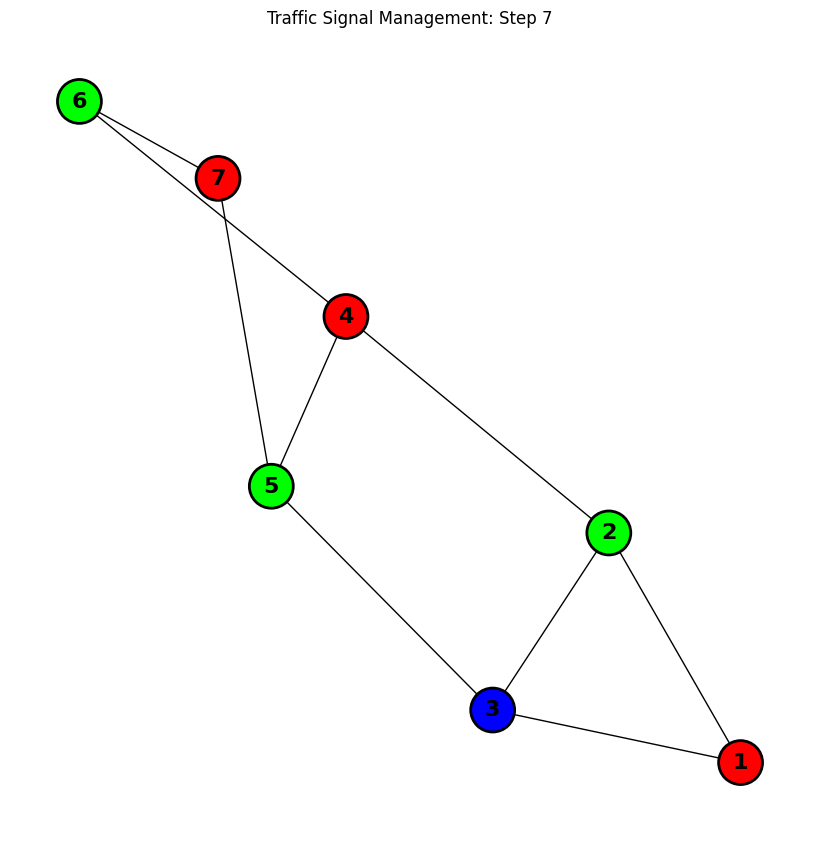

Final Assignment: {1: '#FF0000', 2: '#00FF00', 3: '#0000FF', 4: '#FF0000', 5: '#00FF00', 6: '#00FF00', 7: '#FF0000'}


In [1]:
# Traffic Signal Management using Graph Coloring
# Scenario: Optimize the scheduling of traffic lights at intersections to minimize conflicts.
# Each node represents an intersection, and edges represent a direct path between intersections
# where traffic light timings need to be synchronized. The goal is to assign different timing slots
# (colors) to adjacent intersections to avoid simultaneous green signals.

import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Automatically generate a set of colors based on the number of nodes
def generate_colors(num_nodes):
    color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#800080', '#FFA500', '#00FF7F']
    return color_list[:min(num_nodes, len(color_list))]

# Step 2: Function to create a custom graph representing intersections (traffic signal scenario)
def create_traffic_signal_graph():
    G = nx.Graph()
    # Adding intersections (nodes)
    G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])

    # Adding roads (edges) between intersections
    G.add_edges_from([
        (1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5),
        (4, 6), (5, 7), (6, 7)
    ])

    return G

# Step 3: Visualize the graph coloring step by step
def visualize_graph(G, assignment, step, pos):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        node_colors[node - 1] = color  # Adjust for 1-based indexing

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=1000, font_size=16, font_color='black', edge_color='black',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Traffic Signal Management: Step {step}")
    plt.show()

# Step 4: Function to check if a color assignment is valid
def is_valid_color(G, node, color, assignment):
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 5: Minimum Remaining Values (MRV) Heuristic
def select_unassigned_node_MRV(G, assignment, colors):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    mrv_node = None
    min_remaining_values = float('inf')

    for node in unassigned_nodes:
        remaining_values = sum(is_valid_color(G, node, color, assignment) for color in colors)
        if remaining_values < min_remaining_values:
            min_remaining_values = remaining_values
            mrv_node = node

    return mrv_node

# Step 6: Degree Heuristic
def select_unassigned_node_Degree(G, assignment):
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    degree_node = max(unassigned_nodes, key=lambda node: len([n for n in G.neighbors(node) if n not in assignment]))
    return degree_node

# Step 7: Backtracking with Heuristics
def backtracking_with_heuristics(G, assignment, heuristic, step, colors, pos):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Choose the next node to assign a color using the chosen heuristic
    if heuristic == 'MRV':
        node = select_unassigned_node_MRV(G, assignment, colors)
    elif heuristic == 'Degree':
        node = select_unassigned_node_Degree(G, assignment)
    else:
        node = list(G.nodes)[len(assignment)]  # Fallback, default to a sequential assignment

    for color in colors:
        if is_valid_color(G, node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(G, assignment, step, pos)  # Visualize the current step
            result = backtracking_with_heuristics(G, assignment, heuristic, step+1, colors, pos)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 8: Run the graph coloring with predefined graph (Traffic Signal Management Scenario)
def run_traffic_signal_management():
    G = create_traffic_signal_graph()  # Create the traffic signal graph
    colors = generate_colors(len(G.nodes))  # Generate colors based on the number of nodes

    pos = nx.spring_layout(G, seed=42)  # Generate the position for the graph layout

    # Choose a heuristic: 'MRV' or 'Degree'
    heuristic = 'MRV'  # You can change this to 'Degree' to test the other heuristic

    # Perform backtracking with the chosen heuristic
    final_assignment = backtracking_with_heuristics(G, {}, heuristic, 1, colors, pos)
    print("Final Assignment:", final_assignment)

# Step 9: Execute the Traffic Signal Management scenario
run_traffic_signal_management()
